In [2]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# XGBoost
from xgboost.sklearn import XGBRegressor
import pandas as pd
import os

#data_suntime=pd.read_excel("C:/Users/nancy/Desktop/SuntimeData (1).xlsx")
#data_rain=pd.read_csv("C:/Users/nancy/Desktop/all state precipitation (1).csv")


In [5]:
data_yeild=pd.read_csv("C:/Users/nancy/Desktop/WheatYield_reset.csv")

In [ ]:
data_suntime.rename(columns={"encode":"Encode"},inplace=True)
data_temperature.rename(columns={"encode_state":"Encode"},inplace=True)
#data_rain.columns

In [6]:
#將字串轉成浮點數
for j in range(len(data_yeild["Value (bu)"])):
    n=data_yeild["Value (bu)"][j].split(",")
    number=''
    for k in n:
        number+=k
        data_yeild["Value (bu)"][j]=int(number)

C:\Users\nancy\AppData\Local\Temp\ipykernel_23164\2000229807.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_yeild["Value (bu)"][j]=int(number)


In [10]:
'''def transforme_df(origin_df,month_name,state_name="State",values_to_run='Total_Suntime'):
    #將分類好的 dataframe 存成新的
    grouped=origin_df.groupby(["Year"])
    new_dataframes_1= {}
    for group_name, group_index in grouped.groups.items():
        group_df = origin_df.loc[group_index]
        new_dataframes_1[group_name] = group_df

    # 打印每个新的 DataFrame
    encose_state=pd.DataFrame([x for x in range(0,9)],columns=["Encode"])
    Subject=[month_name+str(x) for x in range(1,13)]
    year = 1896
    reedit_list_df = {}
    for dpovit in new_dataframes_1.values():

        df_pivoted_1896 = dpovit.pivot(index=state_name, columns='Month', values=values_to_run)
    
        df_pivoted_1896.rename(columns=dict(zip(df_pivoted_1896.columns, Subject)), inplace=True)
        print(df_pivoted_1896)
        df_pivoted_1896.reset_index(inplace=True)
        year_list=pd.DataFrame(list([year]*9),columns=["Year"])
        df_pivoted_1896 = pd.concat([df_pivoted_1896, encose_state,year_list], axis=1)
        reedit_list_df[year] = df_pivoted_1896
        year+=1
    transed_pd=list(reedit_list_df.values())
    transformed_suntimes=transed_pd[0]
    for i in range(1,len(transed_pd)):
        transformed_suntimes=pd.concat([transformed_suntimes,transed_pd[i]],axis=0)

    return transformed_suntimes


In [11]:
def transforme_df(origin_df,month_name,state_name="State",values_to_run=['Total_Suntime']):
    #將分類好的 dataframe 存成新的
    grouped=origin_df.groupby(["Year"])
    new_dataframes_1= {}
    for group_name, group_index in grouped.groups.items():
        group_df = origin_df.loc[group_index]
        new_dataframes_1[group_name] = group_df

    # 打印每个新的 DataFrame
    encose_state=pd.DataFrame([x for x in range(0,9)],columns=["encode_state"])
    Subject=[month_name+str(x) for x in range(1,13)]
    year = 1896
    reedit_list_df = {}
    for dpovit in new_dataframes_1.values():

        df_pivoted_1896 = dpovit.pivot(index=state_name, columns='Month', values=values_to_run)
        df_pivoted_1896.rename(columns=dict(zip(df_pivoted_1896.columns, Subject)), inplace=True)
        
        df_pivoted_1896.reset_index(inplace=True)
        year_list=pd.DataFrame(list([year]*9),columns=["Year"])
        df_pivoted_1896 = pd.concat([df_pivoted_1896, encose_state,year_list], axis=1)
        reedit_list_df[year] = df_pivoted_1896
        year+=1
    transed_pd=list(reedit_list_df.values())
    transformed_suntimes=transed_pd[0]
    for i in range(1,len(transed_pd)):
        transformed_suntimes=pd.concat([transformed_suntimes,transed_pd[i]],axis=0)

    return transformed_suntimes


In [7]:
rain = pd.read_csv("forecast_XGboost_avg_max_min.csv")

In [9]:
transforme_rain_df=transforme_df(rain,"rain_month")

KeyError: 'State'

In [30]:
transforme_suntimes_df=transforme_df(data_suntime,"suntime_month")


In [31]:
Subject_1=["state"]
for month_name in ["suntimes_month"]:
    Subject_1+=[month_name+str(x) for x in range(1,13)]

transforme_suntimes_df.rename(columns=dict(zip(transforme_suntimes_df.columns, Subject_1)), inplace=True)

In [32]:

transforme_suntimes_df

,state,suntimes_month1,suntimes_month2,suntimes_month3,suntimes_month4,suntimes_month5,suntimes_month6,suntimes_month7,suntimes_month8,suntimes_month9,suntimes_month10,suntimes_month11,suntimes_month12,Encode,Year
0,COLORADO,1092018,1121529,1336531,1429874,1596277,1602410,1625343,1520925,1341215,1244644,1083937,1058346,0,1896
1,KANSAS,1096149,1123393,1336657,1428156,1592840,1598247,1621521,1518616,1340766,1245447,1086997,1062395,1,1896
2,MINNESOTA,1017221,1083524,1333103,1465584,1669458,1692396,1708150,1570943,1351683,1212599,1019383,971543,2,1896
3,MONTANA,1003055,1074479,1332763,1472150,1682791,1708788,1722992,1579646,1353322,1210196,1007701,955875,3,1896
4,NEBRASKA,1066815,1108617,1335274,1442148,1621326,1633075,1653670,1538179,1344852,1232754,1061737,1028618,4,1896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,NEBRASKA,1068252,1070133,1332441,1439635,1619427,1632523,1654610,1540137,1347258,1235550,1063936,1029230,4,2022
5,NORTH DAKOTA,999814,1035332,1328897,1471604,1685895,1715044,1730642,1585994,1357206,1209544,1005677,950010,5,2022
6,OKLAHOMA,1123804,1098131,1335583,1413535,1565901,1566923,1593714,1502738,1339131,1257813,1111428,1092998,6,2022
7,SOUTH DAKOTA,1036450,1053541,1330779,1454565,1650285,1670643,1689804,1561478,1351872,1223612,1036790,992497,7,2022


In [10]:
data_rain.columns

Index(['Year', 'Month', 'PastTemperature', 'PastPrecipitation',
       'Precipitation', 'Encode'],
      dtype='object')

In [12]:
transforme_rain_df=transforme_df(rain,"rain_month","encode_state",['PastTemperature','PastPrecipitation','Precipitation'])

KeyError: "None of [Index(['PastTemperature', 'PastPrecipitation', 'Precipitation'], dtype='object')] are in the [columns]"

In [25]:
Subject_2=["state"]
for month_name in ["PastTemperature_month",'PastPrecipitation_month','Precipitation_month']:
    Subject_2+=[month_name+str(x) for x in range(1,13)]

transforme_rain_df.rename(columns=dict(zip(transforme_rain_df.columns, Subject_2)), inplace=True)


In [33]:
transforme_rain_df

,state,PastTemperature_month1,PastTemperature_month2,PastTemperature_month3,PastTemperature_month4,PastTemperature_month5,PastTemperature_month6,PastTemperature_month7,PastTemperature_month8,PastTemperature_month9,...,Precipitation_month5,Precipitation_month6,Precipitation_month7,Precipitation_month8,Precipitation_month9,Precipitation_month10,Precipitation_month11,Precipitation_month12,Encode,Year
0,0,21.6,19.2,31.7,44.5,51.6,58.5,63.2,64.9,58.8,...,1.14,1.01,2.59,1.41,2.17,1.09,0.95,0.77,0,1896
1,1,23.5,23.9,42.0,58.2,65.2,72.0,74.6,75.2,72.0,...,4.46,4.06,4.37,2.57,2.98,2.64,0.83,0.45,1,1896
2,2,-0.6,5.7,23.3,48.0,55.2,62.9,66.2,65.0,58.7,...,5.53,3.67,2.17,2.43,2.39,2.60,2.82,0.60,2,1896
3,3,9.6,15.3,28.6,44.7,49.2,54.5,63.2,62.2,50.7,...,3.85,1.99,1.38,1.09,2.30,0.67,3.74,0.69,3,1896
4,4,16.7,18.4,34.4,53.6,59.0,66.2,71.0,71.0,65.5,...,3.72,3.96,3.87,1.81,2.19,1.71,1.11,0.18,4,1896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,4,29.3,16.5,42.6,47.0,57.9,72.8,75.0,74.3,67.6,...,3.64,1.78,3.07,1.01,1.35,0.56,0.31,1.01,4,2022
5,5,21.0,5.8,35.9,40.7,52.8,69.3,73.8,68.9,62.2,...,4.08,2.39,2.78,1.38,0.65,0.68,0.70,1.49,5,2022
6,6,39.7,31.3,53.9,57.4,65.9,77.4,80.0,81.3,76.7,...,6.29,3.71,1.61,2.16,0.79,2.85,2.66,1.91,6,2022
7,7,26.5,12.8,39.4,43.6,55.0,72.3,75.3,72.5,65.0,...,3.41,2.34,2.79,1.83,0.59,0.56,0.49,1.42,7,2022


In [56]:
data_temperature.drop(columns=["Unnamed:0","Date"],inplace=True)

In [60]:
data_temperature.columns

Index(['Average Temperature_x', 'Anomaly', 'Maximun Temperature', 'Anomaly.1',
       ' Minimum Temperature', 'Anomaly.2', 'Average Temperature_y', 'Encode',
       'Year', 'Month'],
      dtype='object')

In [61]:

transforme_temperature_df=transforme_df(data_temperature,"temperayure_month","Encode",['Average Temperature_x', 'Anomaly', 'Maximun Temperature', 'Anomaly.1',
       ' Minimum Temperature', 'Anomaly.2', 'Average Temperature_y'])

In [63]:
Subject_3=["state"]
for month_name in ['Average Temperature_current_month', 'Anomaly_month', 'Maximun Temperature_month', 'Anomaly.1_month',
       ' Minimum Temperature_month', 'Anomaly.2_month', 'Average Temperature_next_year_month']:
    Subject_3+=[month_name+str(x) for x in range(1,13)]

transforme_temperature_df.rename(columns=dict(zip(transforme_temperature_df.columns, Subject_3)), inplace=True)


In [64]:
transforme_temperature_df

,state,Average Temperature_current_month1,Average Temperature_current_month2,Average Temperature_current_month3,Average Temperature_current_month4,Average Temperature_current_month5,Average Temperature_current_month6,Average Temperature_current_month7,Average Temperature_current_month8,Average Temperature_current_month9,...,Average Temperature_next_year_month5,Average Temperature_next_year_month6,Average Temperature_next_year_month7,Average Temperature_next_year_month8,Average Temperature_next_year_month9,Average Temperature_next_year_month10,Average Temperature_next_year_month11,Average Temperature_next_year_month12,Encode,Year
0,0,21.6,19.2,31.7,44.5,51.6,58.5,63.2,64.9,58.8,...,53.1,63.8,67.0,65.9,56.5,44.7,29.0,28.8,0,1896
1,1,21.6,19.2,31.7,44.5,51.6,58.5,63.2,64.9,58.8,...,53.1,63.8,67.0,65.9,56.5,44.7,29.0,28.8,1,1896
2,2,21.6,19.2,31.7,44.5,51.6,58.5,63.2,64.9,58.8,...,53.1,63.8,67.0,65.9,56.5,44.7,29.0,28.8,2,1896
3,3,21.6,19.2,31.7,44.5,51.6,58.5,63.2,64.9,58.8,...,53.1,63.8,67.0,65.9,56.5,44.7,29.0,28.8,3,1896
4,4,21.6,19.2,31.7,44.5,51.6,58.5,63.2,64.9,58.8,...,53.1,63.8,67.0,65.9,56.5,44.7,29.0,28.8,4,1896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,4,26.7,24.8,35.8,43.1,52.9,65.7,70.0,67.4,62.4,...,53.3,64.3,70.3,67.8,62.5,47.6,31.3,25.6,4,2022
5,5,26.7,24.8,35.8,43.1,52.9,65.7,70.0,67.4,62.4,...,53.3,64.3,70.3,67.8,62.5,47.6,31.3,25.6,5,2022
6,6,26.7,24.8,35.8,43.1,52.9,65.7,70.0,67.4,62.4,...,53.3,64.3,70.3,67.8,62.5,47.6,31.3,25.6,6,2022
7,7,26.7,24.8,35.8,43.1,52.9,65.7,70.0,67.4,62.4,...,53.3,64.3,70.3,67.8,62.5,47.6,31.3,25.6,7,2022


In [74]:
transforme_rain_df.drop(columns=["state"],inplace=True)
transforme_temperature_df.drop(columns=["state"],inplace=True)


In [6]:
train_data=transforme_rain_df.merge(transforme_temperature_df,on=["Encode","Year"],how="inner")


NameError: name 'transforme_rain_df' is not defined

In [70]:
transforme_suntimes_df.drop(columns=["state"],inplace=True)

In [81]:
if "Encode" in transforme_suntimes_df.columns:
    print(1)

1


In [79]:
train_data.columns

Index(['PastTemperature_month1', 'PastTemperature_month2',
       'PastTemperature_month3', 'PastTemperature_month4',
       'PastTemperature_month5', 'PastTemperature_month6',
       'PastTemperature_month7', 'PastTemperature_month8',
       'PastTemperature_month9', 'PastTemperature_month10',
       ...
       'Average Temperature_next_year_month3',
       'Average Temperature_next_year_month4',
       'Average Temperature_next_year_month5',
       'Average Temperature_next_year_month6',
       'Average Temperature_next_year_month7',
       'Average Temperature_next_year_month8',
       'Average Temperature_next_year_month9',
       'Average Temperature_next_year_month10',
       'Average Temperature_next_year_month11',
       'Average Temperature_next_year_month12'],
      dtype='object', length=122)

In [5]:
train_data=train_data.merge(transforme_suntimes_df,on=["Encode","Year"],how="inner")

NameError: name 'train_data' is not defined

In [85]:
train_data

,PastTemperature_month1,PastTemperature_month2,PastTemperature_month3,PastTemperature_month4,PastTemperature_month5,PastTemperature_month6,PastTemperature_month7,PastTemperature_month8,PastTemperature_month9,PastTemperature_month10,...,suntimes_month3,suntimes_month4,suntimes_month5,suntimes_month6,suntimes_month7,suntimes_month8,suntimes_month9,suntimes_month10,suntimes_month11,suntimes_month12
0,21.6,19.2,31.7,44.5,51.6,58.5,63.2,64.9,58.8,45.1,...,1336531,1429874,1596277,1602410,1625343,1520925,1341215,1244644,1083937,1058346
1,23.5,23.9,42.0,58.2,65.2,72.0,74.6,75.2,72.0,51.7,...,1336657,1428156,1592840,1598247,1621521,1518616,1340766,1245447,1086997,1062395
2,-0.6,5.7,23.3,48.0,55.2,62.9,66.2,65.0,58.7,39.7,...,1333103,1465584,1669458,1692396,1708150,1570943,1351683,1212599,1019383,971543
3,9.6,15.3,28.6,44.7,49.2,54.5,63.2,62.2,50.7,42.8,...,1332763,1472150,1682791,1708788,1722992,1579646,1353322,1210196,1007701,955875
4,16.7,18.4,34.4,53.6,59.0,66.2,71.0,71.0,65.5,46.1,...,1335274,1442148,1621326,1633075,1653670,1538179,1344852,1232754,1061737,1028618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,29.3,16.5,42.6,47.0,57.9,72.8,75.0,74.3,67.6,53.2,...,1332441,1439635,1619427,1632523,1654610,1540137,1347258,1235550,1063936,1029230
1139,21.0,5.8,35.9,40.7,52.8,69.3,73.8,68.9,62.2,48.6,...,1328897,1471604,1685895,1715044,1730642,1585994,1357206,1209544,1005677,950010
1140,39.7,31.3,53.9,57.4,65.9,77.4,80.0,81.3,76.7,64.4,...,1335583,1413535,1565901,1566923,1593714,1502738,1339131,1257813,1111428,1092998
1141,26.5,12.8,39.4,43.6,55.0,72.3,75.3,72.5,65.0,51.2,...,1330779,1454565,1650285,1670643,1689804,1561478,1351872,1223612,1036790,992497


In [5]:
'''for j in range(len(data_yeild["Year"])):
    if data_yeild["Year"][j]<1896:
        data_yeild.drop([j],inplace=True)

In [28]:
''''data_yeild.reset_index(inplace=True)
data_yeild.drop(columns=["index"],inplace=True)

In [ ]:
'''data_yeild.drop(columns=["level_0"],inplace=True)

In [29]:
len(data_yeild)

1161

In [11]:
print((1896-2023)*9)

-1143


In [40]:
train_data

NameError: name 'train_data' is not defined

In [11]:
'''year=[]
for k in range(1896,2023):
    year+=[k]*12
month=[]
for k in range(1896,2023):
    month+=[x for x in range(1,13)]
month=month*9
year=year*9
data_temperature=pd.concat([data_temperature,pd.DataFrame(year,columns=["Year"]),pd.DataFrame(month,columns=["Month"])],axis=1)
    

In [16]:
'''data_temperature.drop(columns=['Unnamed: 0'],inplace=True)
data_temperature.rename(columns={"encode_state":"Encode"},inplace=True)

In [2]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [8]:
data_yeild.columns

Index(['State', 'Year', 'Commodity', 'Value (bu)', 'encode_state'], dtype='object')

In [3]:
train_data=pd.read_excel("C:/Users/nancy/Desktop/all_train_data.xlsx")

In [7]:
X_train, X_test, y_train, y_test = train_test_split(train_data, data_yeild["Value (bu)"], test_size=0.2, random_state=42)


In [ ]:
'''import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# 假設你有一個訓練集X和對應的目標變量y

# 定義要調整的超參數範圍
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# 創建XGBoost模型
model = xgb.XGBRegressor()

# 使用GridSearchCV進行超參數調整
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
# 使用FOR迴圈遍歷所有超參數組合
for k in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(train_data, data_yeild['Value (bu)'],  test_size = k/100, random_state=71)
    for params in grid_search.param_grid:
        # 設置模型的超參數
        model.set_params(**params)
        
        # 訓練模型
        model.fit(X, y)
        
        # 在測試集上進行預測
        y_pred = model.predict(X_test)
        
        # 計算模型的評估指標，如均方誤差（MSE）或R平方（R2）
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # 輸出評估結果
        print("Hyperparameters:", params)
        print("MSE:", mse)
        print("R2:", r2)
        print("-------------------")


In [14]:
data_true=data_yeild["Value (bu)"]+data_yeild["encode_state"]

In [15]:
data_true=data_true.to_numpy()

In [16]:
data_true_with_dummies = pd.get_dummies(data_true, columns=['encode_state'], drop_first=True)

C:\Users\nancy\AppData\Local\Temp\ipykernel_19180\3661851297.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data_true_with_dummies = pd.get_dummies(data_true, columns=['encode_state'], drop_first=True)


In [17]:
df_with_dummies = pd.get_dummies(train_data, columns=['Encode'], drop_first=True)


In [18]:
df_with_dummies.drop(columns=["Unnamed: 0"],inplace=True)

df_with_dummies

,PastTemperature_month1,PastTemperature_month2,PastTemperature_month3,PastTemperature_month4,PastTemperature_month5,PastTemperature_month6,PastTemperature_month7,PastTemperature_month8,PastTemperature_month9,PastTemperature_month10,...,suntimes_month11,suntimes_month12,Encode_1,Encode_2,Encode_3,Encode_4,Encode_5,Encode_6,Encode_7,Encode_8
0,21.6,19.2,31.7,44.5,51.6,58.5,63.2,64.9,58.8,45.1,...,1083937,1058346,0,0,0,0,0,0,0,0
1,23.5,23.9,42.0,58.2,65.2,72.0,74.6,75.2,72.0,51.7,...,1086997,1062395,1,0,0,0,0,0,0,0
2,-0.6,5.7,23.3,48.0,55.2,62.9,66.2,65.0,58.7,39.7,...,1019383,971543,0,1,0,0,0,0,0,0
3,9.6,15.3,28.6,44.7,49.2,54.5,63.2,62.2,50.7,42.8,...,1007701,955875,0,0,1,0,0,0,0,0
4,16.7,18.4,34.4,53.6,59.0,66.2,71.0,71.0,65.5,46.1,...,1061737,1028618,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,29.3,16.5,42.6,47.0,57.9,72.8,75.0,74.3,67.6,53.2,...,1063936,1029230,0,0,0,1,0,0,0,0
1139,21.0,5.8,35.9,40.7,52.8,69.3,73.8,68.9,62.2,48.6,...,1005677,950010,0,0,0,0,1,0,0,0
1140,39.7,31.3,53.9,57.4,65.9,77.4,80.0,81.3,76.7,64.4,...,1111428,1092998,0,0,0,0,0,1,0,0
1141,26.5,12.8,39.4,43.6,55.0,72.3,75.3,72.5,65.0,51.2,...,1036790,992497,0,0,0,0,0,0,1,0


In [ ]:
df_with_dummies.drop(columns=["Year","State","Commodity"],inplace=True)
# 将时间序列数据和虚拟变量提取出来
ts_data = df_with_dummies[['Value (bu)']]
exog_data = df_with_dummies.drop(['Value (bu)'], axis=1)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(train_data, data_true, test_size = k/100, random_state=71)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [27]:
X_train, X_test, y_train, y_test = train_test_split(train_data, data_true, test_size = 90/100, random_state=71)

clf = xgb.XGBRegressor(random_state = 71, n_estimators = 2, max_depth = 3, learning_rate = 5)
ratio 0.2


In [8]:
clf = xgb.XGBRegressor(random_state = 71, n_estimators = 2, max_depth = 3, learning_rate = 5)
clf.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=2, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=71, ...)

In [44]:
clf = xgb.XGBRegressor(random_state = 71, n_estimators = 4, max_depth = 1, learning_rate = 2)
clf.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=4, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=71, ...)

In [9]:
y_pred_train = clf.predict(X_train) #train


In [22]:
import numpy as np

In [106]:
for i in y_train.isna():
    if i==True:
        print(i)

In [10]:
y_pred_test = clf.predict(X_test) #train


In [11]:
from sklearn.metrics import r2_score


In [15]:
    mse = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    print("RMSE:", mse**(0.5))
    print("MSE:", mse)
    print("R2:", r2)
    print("-------------------")


RMSE: 1750828672.807423
MSE: 3.0654010415246024e+18
R2: -378.38355719597945
-------------------


In [16]:
# Creating a Function for MAPE
import numpy as np

def mape(test, pred):
    test, pred = np.array(test), np.array(pred)
    mape = np.mean(np.abs((test - pred) / test))
    return mape

In [17]:
mape_9=mape(y_test, y_pred_test)
print("MAPE:", mape_9)

MAPE: 27.484321361123264


In [49]:

import xgboost as xgb

ratio = 100
ratiovalues = [i for i in range(50, ratio, 10)]
n_estimator = 250
n_estimatorvalues = [i for i in range(100, n_estimator, 50)]
depth = 5
depthvalues = [i for i in range(1, depth)]
rate = 3
ratevalues = [i for i in range(1, rate)]
relative_best_train_score = 0
relative_best_test_score = 0
relative_best_ratio = 0
relative_best_estimators = 0
relative_best_depth = 0
relative_best_rate = 0

for k in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(df_with_dummies,data_true_with_dummies, test_size = k/100, random_state=71)
    for l in n_estimatorvalues:
        for i in depthvalues:
            for j in ratevalues:
                clf = xgb.XGBRegressor(random_state = 71, n_estimators = l, max_depth = i, learning_rate = j)
                clf.fit(X_train, y_train)
                y_pred_train = clf.predict(X_train) #train
                y_pred_test = clf.predict(X_test) #train
                train_mse = mean_squared_error(y_test, y_pred_test)
                train_r2 = r2_score(y_test, y_pred_test)
    

                



                if ((train_r2 > relative_best_train_score) and (train_mse < relative_best_test_score)):
                    relative_best_train_score = train_r2
                    relative_best_test_score = train_mse 
                    relative_best_ratio = k
                    relative_best_estimators = l
                    relative_best_depth = i
                    relative_best_rate = j

print("best ratio of testing data:", relative_best_ratio, "best no. of estimators:", relative_best_estimators, "best depth:", relative_best_depth, "best learning_rate:", relative_best_rate, \
      "\nr2 score:", relative_best_train_score, "mse score:", relative_best_test_score)



In [27]:
X_train, X_test, y_train, y_test = train_test_split(df_with_dummies, data_true_with_dummies, test_size = 0.2, random_state=71)
clf = xgb.XGBRegressor(random_state = 71, n_estimators = 100, max_depth = 1, learning_rate = 1)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train) #train
y_pred_test = clf.predict(X_test) #train

In [136]:
train_data.to_excel("C:/Users/nancy/Desktop/all_train_data.xlsx")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

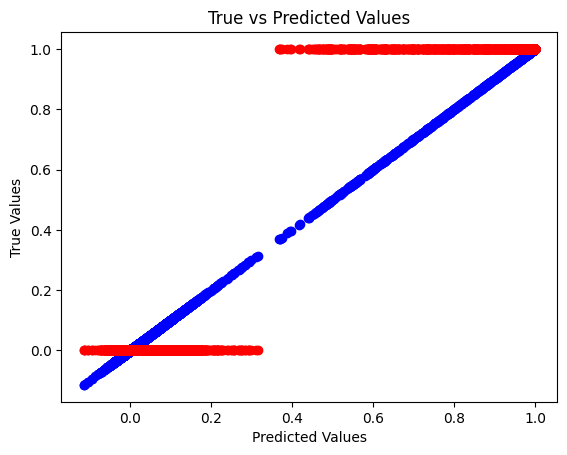

In [22]:
import matplotlib.pyplot as plt


# 绘制预测值和真实值的散点图
# 绘制预测值的散点图，颜色为蓝色
plt.scatter(y_pred_train, y_pred_train, color='blue', label='Predicted')

# 绘制真实值的散点图，颜色为红色
plt.scatter(y_pred_train, y_train, color='red', label='True')
# 添加标签和标题
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('True vs Predicted Values')

# 添加一条理想的拟合线
plt.plot([min(y_pred_train), max(y_pred_train)],
         [min(y_pred_train), max(y_pred_train)],
         color='red', label='Ideal Fit')

# 添加图例
plt.legend()

# 显示图形
plt.show()


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 假設你有一個包含虛擬變數的數據集，並且將它們存儲在X和y中
# X是特徵變數，y是目標變數
# 假設你的虛擬變數存儲在X的最後幾列中

# 創建一個ColumnTransformer對象來進行特徵轉換
ct = ColumnTransformer(
    [("encoder", OneHotEncoder(), [-1, -2])],  # 虛擬變數所在的列索引
    remainder="passthrough"  # 其他列保持不變
)

# 使用ColumnTransformer對X進行特徵轉換
X = ct.fit_transform(X)

# 切分數據集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 創建Lasso模型對象
lasso = Lasso(alpha=0.1)  # alpha是正則化參數，可以根據需要進行調整

# 在訓練集上擬合模型
lasso.fit(X_train, y_train)

# 使用模型進行預測
y_pred = lasso.predict(X_test)

# 計算均方誤差
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
